# Annotation: 
## Supplementary Table 2.Read raw counts. <br>
The following acronyms were used: <br>

## Experiment Designs:
V: Vialone Nano; B: Baldo; <br>
R: root; L: leaves; 

## 2 Experimental Conditions: 
T: treated (3 days salt-stressed seedlings); 
C: control (without salt stress); 
1,2,3 suffices stand for technical replicates.

In [12]:
import pandas as pd
import numpy as np
from math import *
from scipy.stats import ttest_ind, chi2_contingency
from quantile_norm import *

df = pd.read_csv('rna_data.csv', header=0, low_memory=False)
df['p_score'] = nan
#df

In [13]:
# normalization
result = quantileNormalize(df[['VLT1','VLT2','VLT3']])
df['VLT1'],df['VLT2'],df['VLT3'] = result['VLT1'],result['VLT2'],result['VLT3']

result = quantileNormalize(df[['VLC1','VLC2','VLC3']])
df['VLC1'],df['VLC2'],df['VLC3'] = result['VLC1'],result['VLC2'],result['VLC3']

result = quantileNormalize(df[['VRT1','VRT2','VRT3']])
df['VRT1'],df['VRT2'],df['VRT3'] = result['VRT1'],result['VRT2'],result['VRT3']

result = quantileNormalize(df[['VRC1','VRC2','VRC3']])
df['VRC1'],df['VRC2'],df['VRC3'] = result['VRC1'],result['VRC2'],result['VRC3']


result = quantileNormalize(df[['BLT1','BLT2','BLT3']])
df['BLT1'],df['BLT2'],df['BLT3'] = result['BLT1'],result['BLT2'],result['BLT3']

result = quantileNormalize(df[['BLC1','BLC2','BLC3']])
df['BLC1'],df['BLC2'],df['BLC3'] = result['BLC1'],result['BLC2'],result['BLC3']

result = quantileNormalize(df[['BRT1','BRT2','BRT3']])
df['BRT1'],df['BRT2'],df['BRT3'] = result['BRT1'],result['BRT2'],result['BRT3']

result = quantileNormalize(df[['BRC1','BRC2','BRC3']])
df['BRC1'],df['BRC2'],df['BRC3'] = result['BRC1'],result['BRC2'],result['BRC3']

In [14]:
# Vialone Nano - Leaf 
data_set1 = df[['VLT1','VLT2','VLT3']].to_numpy()
data_set2 = df[['VLC1','VLC2','VLC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_score'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df[df['p_score'] < 0.01]
df = df.dropna()
#df

In [15]:
# Vialone Nano - Root 
data_set1 = df[['VRT1','VRT2','VRT3']].to_numpy()
data_set2 = df[['VRC1','VRC2','VRC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_score'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df[df['p_score'] < 0.01]
df = df.dropna()
#df

In [16]:
# Baldo - Leaf 
data_set1 = df[['BLT1','BLT2','BLT3']].to_numpy()
data_set2 = df[['BLC1','BLC2','BLC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_score'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df[df['p_score'] < 0.01]
df = df.dropna()
#df

In [17]:
# Baldo - Root 
data_set1 = df[['BRT1','BRT2','BRT3']].to_numpy()
data_set2 = df[['BRC1','BRC2','BRC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_score'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df[df['p_score'] < 0.01]
df = df.dropna()

In [18]:
# Finding folds:
df['VL_fold'] = np.log2(df[['VLT1','VLT2','VLT3']].mean(axis=1) / df[['VLC1','VLC2','VLC3']].mean(axis=1))
df['VR_fold'] = np.log2(df[['VRT1','VRT2','VRT3']].mean(axis=1) / df[['VRC1','VRC2','VRC3']].mean(axis=1))
df['BL_fold'] = np.log2(df[['BLT1','BLT2','BLT3']].mean(axis=1) / df[['BLC1','BLC2','BLC3']].mean(axis=1))
df['BR_fold'] = np.log2(df[['BRT1','BRT2','BRT3']].mean(axis=1) / df[['BRC1','BRC2','BRC3']].mean(axis=1))

df = df[['GenID','VL_fold','VR_fold','BL_fold','BR_fold']]
df = df.set_index('GenID')
df


C:\Users\DHRUBO\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,VL_fold,VR_fold,BL_fold,BR_fold
GenID,,,,
Os01g47570,1.402632,-2.104337,0.122484,-1.542527
Os01g49510,0.427649,0.835172,0.487115,0.512630
Os01g49680,0.420833,0.436644,0.313471,0.124798
Os01g50450,1.154519,-0.043625,0.455826,0.042344
Os01g50616,1.365922,0.838249,0.801420,0.106268
...,...,...,...,...
Os12g43880,0.941519,-0.515855,0.193572,-0.038378
Os12g43930,0.908603,0.300473,0.723642,0.097995
Os12g44140,0.408465,0.416164,0.264077,0.089236


<AxesSubplot:ylabel='GenID'>

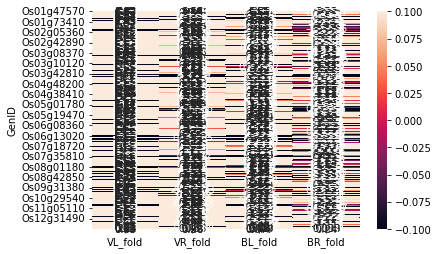

In [19]:
# heatmap to show the fold change in differentially expressed genes. 
import seaborn as sns
sns.heatmap(df, annot=True)